In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "sicilia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,19,Sicilia,1,0,1,2,3,3,3,...,0.0,0.0,0.0,2.0,0.00,33.33,0.00,0.00,0.00,0.000
1,2020-02-26T18:00:00,19,Sicilia,1,0,1,2,3,0,0,...,0.0,0.0,0.0,0.0,0.00,33.33,0.00,0.00,0.00,0.000
2,2020-02-27T18:00:00,19,Sicilia,1,0,1,1,2,-1,1,...,0.0,0.0,0.0,-1.0,0.00,50.00,0.00,0.00,0.00,33.333
3,2020-02-28T18:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,0.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.000
4,2020-02-29T17:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,1.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2020-11-17T17:00:00,19,Sicilia,1505,227,1732,29024,30756,991,1698,...,39.0,10774.0,7001.0,984.0,13.11,5.63,15.76,24.25,1.34,5.705
267,2020-11-18T17:00:00,19,Sicilia,1528,240,1768,30334,32102,1346,1837,...,44.0,9479.0,4867.0,1310.0,13.57,5.51,19.38,37.74,5.73,5.973
268,2020-11-19T17:00:00,19,Sicilia,1532,240,1772,31809,33581,1479,1871,...,40.0,11470.0,7475.0,1475.0,13.54,5.28,16.31,25.03,0.00,5.828
269,2020-11-20T17:00:00,19,Sicilia,1537,242,1779,32977,34756,1175,1634,...,43.0,10020.0,6405.0,1168.0,13.60,5.12,16.31,25.51,0.83,4.866


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 21, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1838
Nuovi tamponi: 9386.0
Percentuale nuovi positivi/nuovi tamponi: 19.6 %
Nuovi guariti: 310.0
Nuovi deceduti: 43.0
Variazione positivi ricoverati con sintomi: 31.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: 1454.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 21, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-22T17:00:00,19,Sicilia,224,15,239,2151,2390,42,108,...,1.0,7008.0,4303.0,20.0,6.28,10.00,1.54,2.51,7.14,4.600
1,2020-09-23T17:00:00,19,Sicilia,230,16,246,2166,2412,22,89,...,3.0,6039.0,3976.0,15.0,6.50,10.20,1.47,2.24,6.67,3.724
2,2020-09-24T17:00:00,19,Sicilia,237,16,253,2208,2461,49,125,...,1.0,5169.0,3121.0,42.0,6.32,10.28,2.42,4.01,0.00,5.182
3,2020-09-25T17:00:00,19,Sicilia,235,13,248,2282,2530,69,107,...,2.0,5330.0,3270.0,74.0,5.24,9.80,2.01,3.27,-18.75,4.348
4,2020-09-26T17:00:00,19,Sicilia,255,13,268,2315,2583,53,110,...,0.0,5558.0,4234.0,33.0,4.85,10.38,1.98,2.60,0.00,4.348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-17T17:00:00,19,Sicilia,1505,227,1732,29024,30756,991,1698,...,39.0,10774.0,7001.0,984.0,13.11,5.63,15.76,24.25,1.34,5.705
57,2020-11-18T17:00:00,19,Sicilia,1528,240,1768,30334,32102,1346,1837,...,44.0,9479.0,4867.0,1310.0,13.57,5.51,19.38,37.74,5.73,5.973
58,2020-11-19T17:00:00,19,Sicilia,1532,240,1772,31809,33581,1479,1871,...,40.0,11470.0,7475.0,1475.0,13.54,5.28,16.31,25.03,0.00,5.828
59,2020-11-20T17:00:00,19,Sicilia,1537,242,1779,32977,34756,1175,1634,...,43.0,10020.0,6405.0,1168.0,13.60,5.12,16.31,25.51,0.83,4.866


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

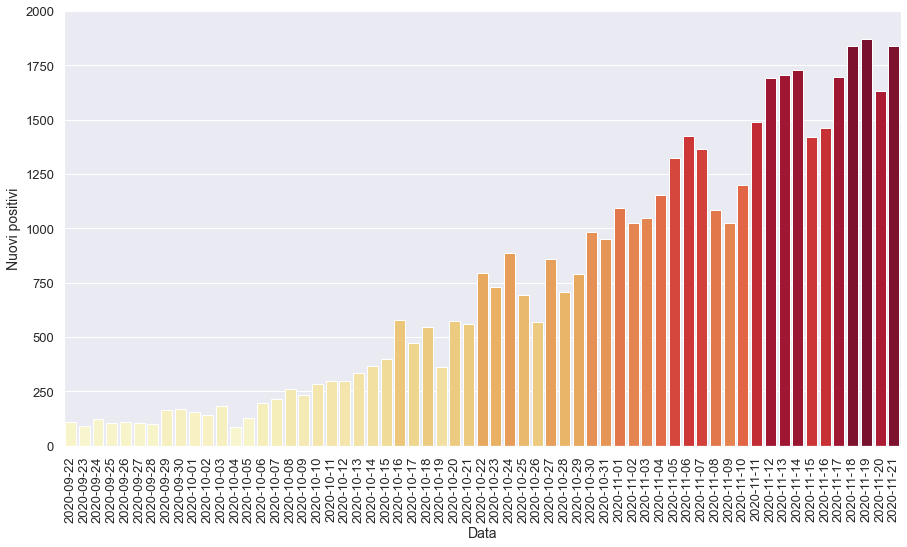

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

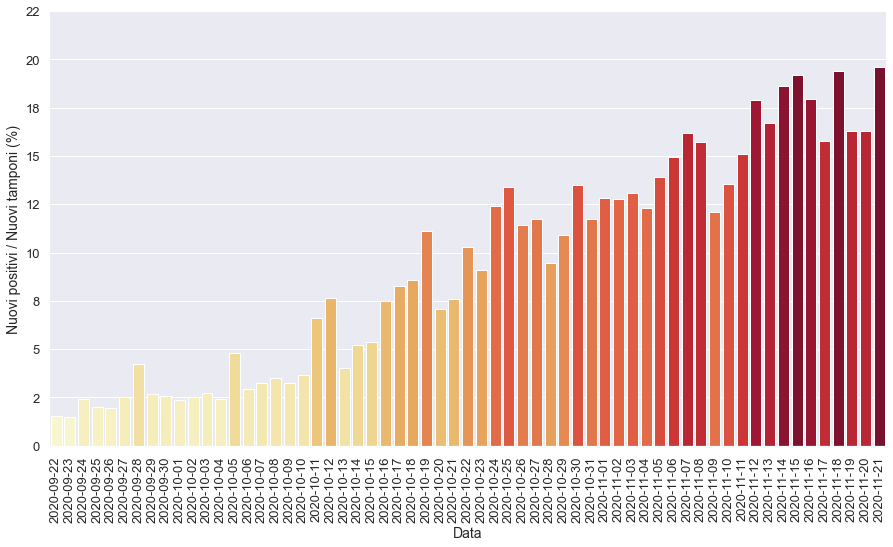

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

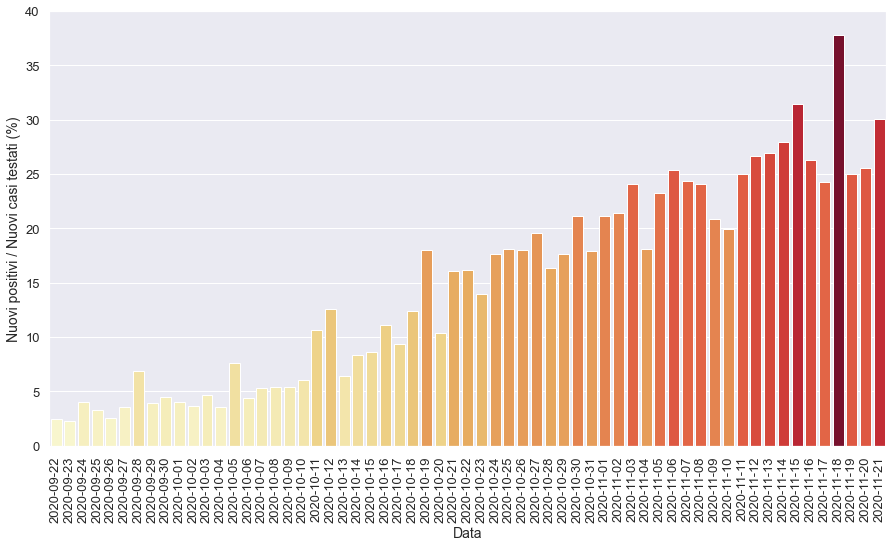

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

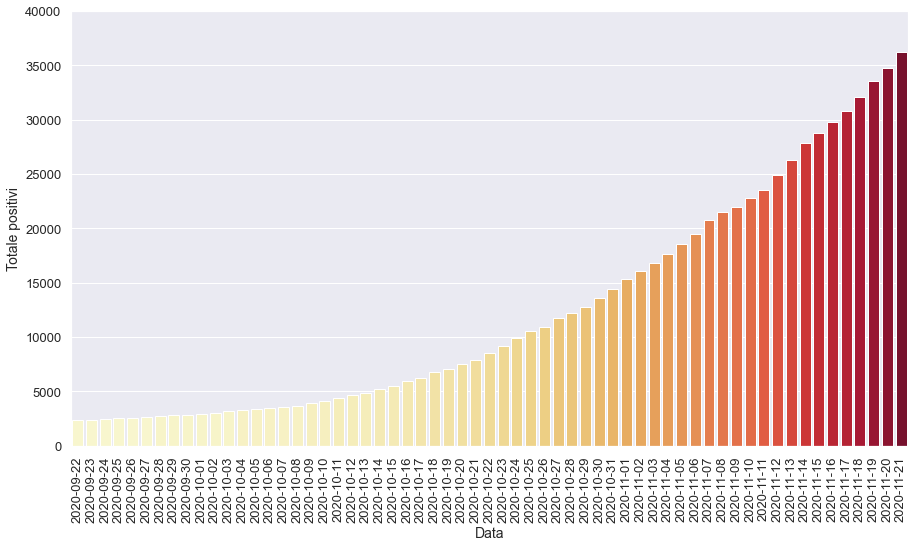

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

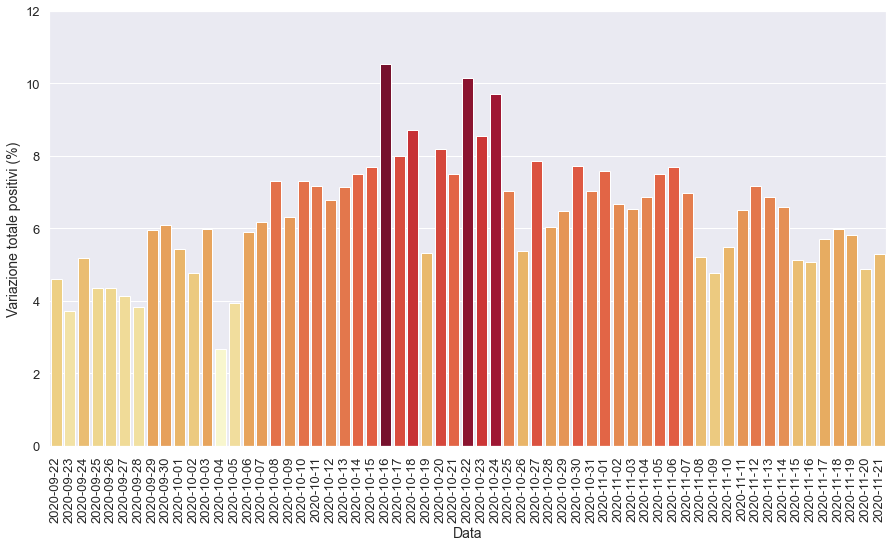

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

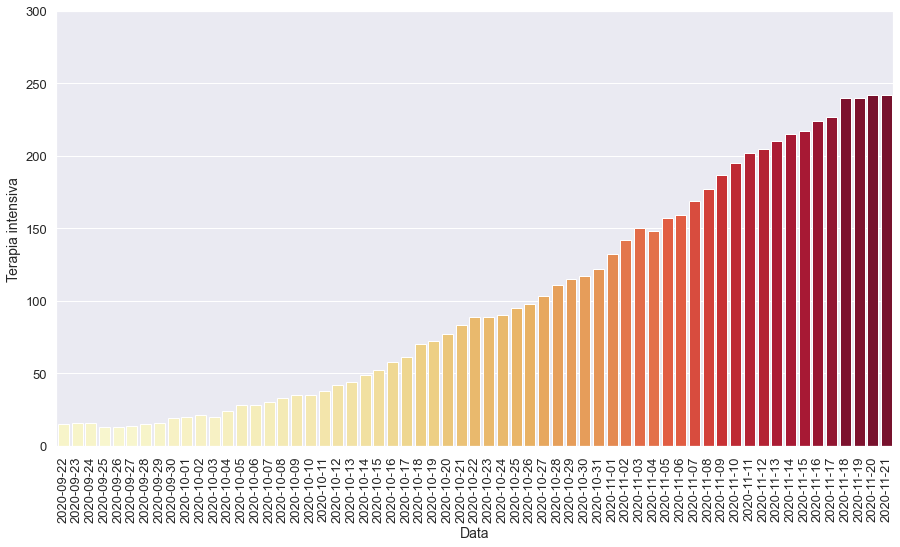

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

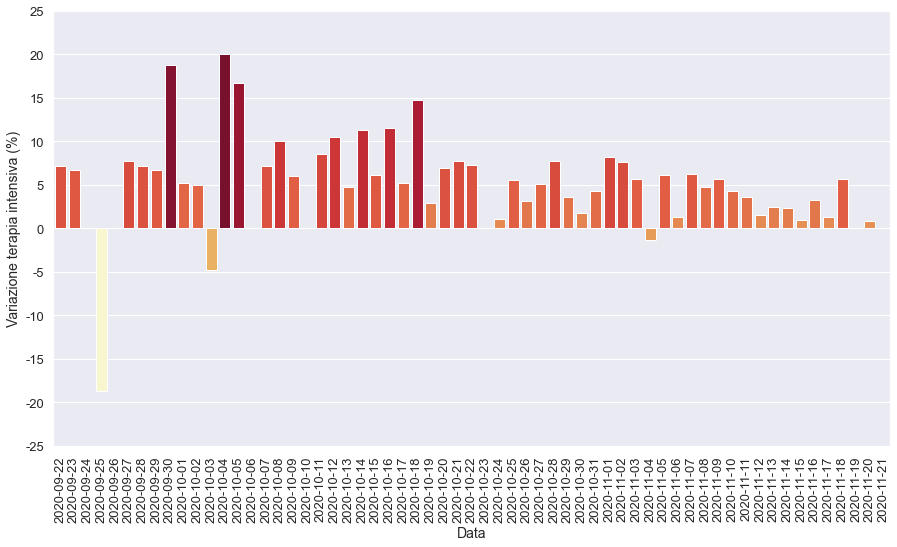

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

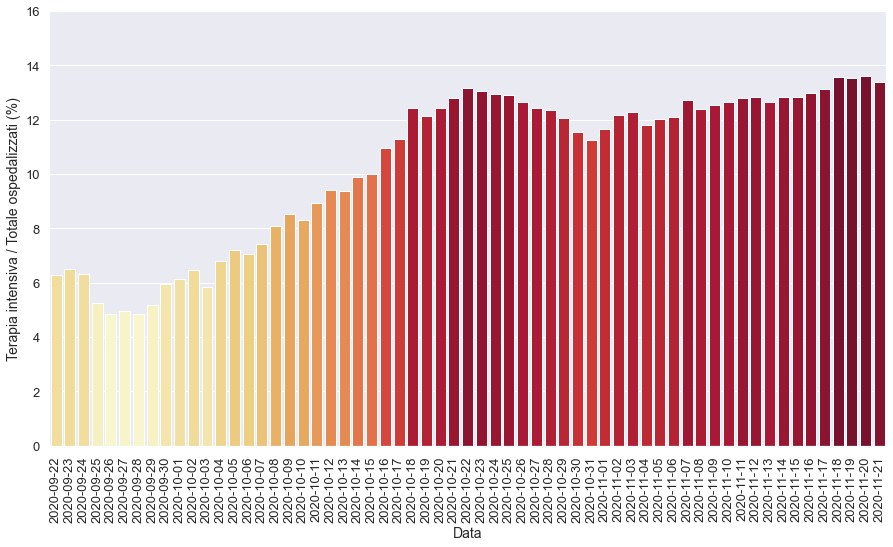

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

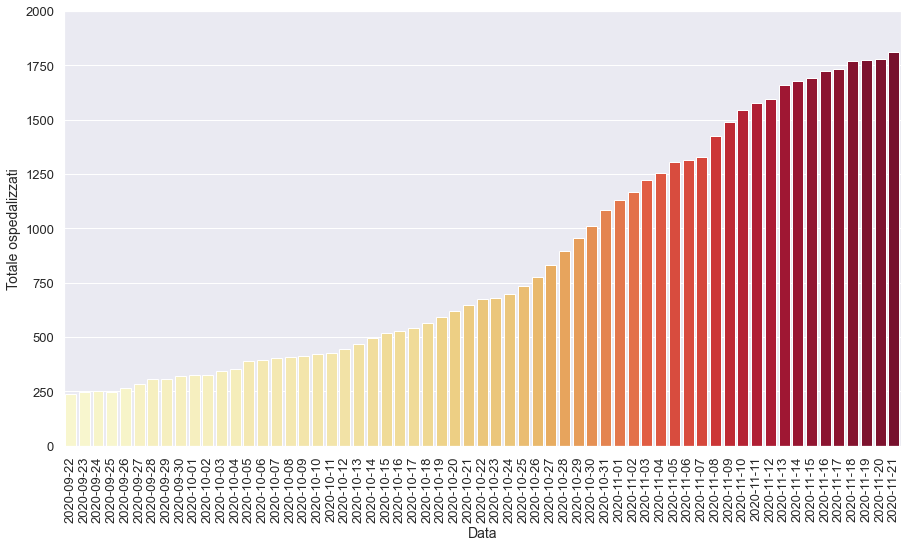

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

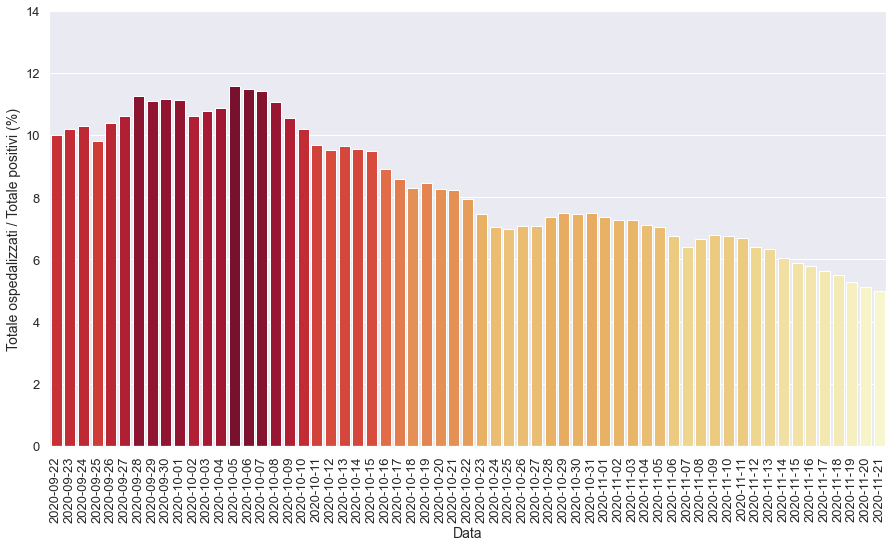

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

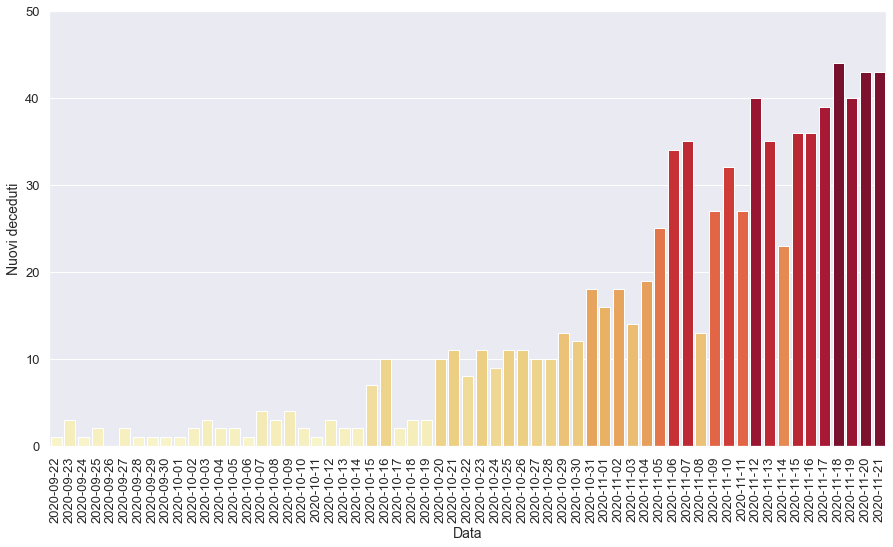

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

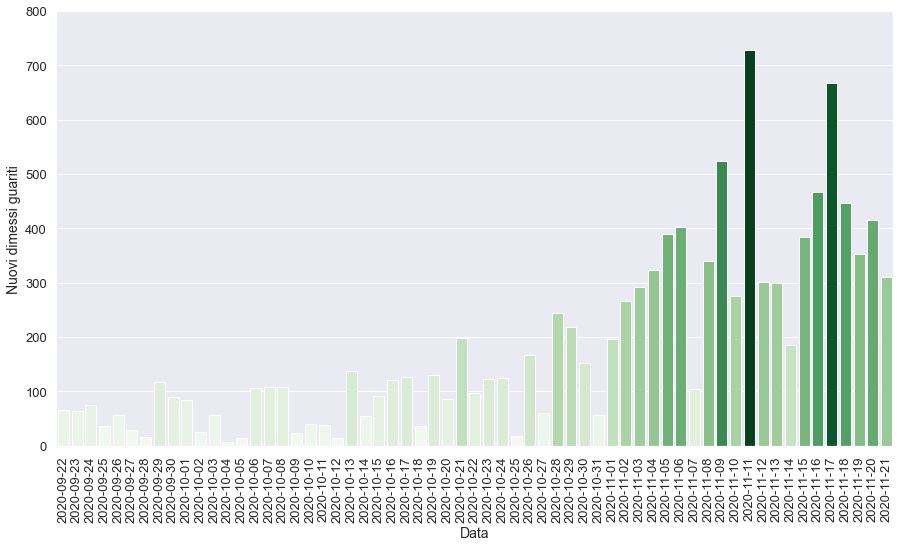

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-22T17:00:00,19,Sicilia,588,89,677,7863,8540,690,796,...,8.0,7732.0,4932.0,661.0,13.15,7.93,10.29,16.14,7.23,10.140
1,2020-10-23T17:00:00,19,Sicilia,593,89,682,8454,9136,596,730,...,11.0,8015.0,5232.0,591.0,13.05,7.46,9.11,13.95,0.00,8.548
2,2020-10-24T17:00:00,19,Sicilia,606,90,696,9193,9889,753,886,...,9.0,7147.0,5034.0,739.0,12.93,7.04,12.40,17.60,1.12,9.698
3,2020-10-25T17:00:00,19,Sicilia,642,95,737,9818,10555,666,695,...,11.0,5193.0,3834.0,625.0,12.89,6.98,13.38,18.13,5.56,7.028
4,2020-10-26T17:00:00,19,Sicilia,677,98,775,10170,10945,390,568,...,11.0,4976.0,3153.0,352.0,12.65,7.08,11.41,18.01,3.16,5.381
5,2020-10-27T17:00:00,19,Sicilia,727,103,830,10904,11734,789,860,...,10.0,7324.0,4391.0,734.0,12.41,7.07,11.74,19.59,5.10,7.857
6,2020-10-28T17:00:00,19,Sicilia,787,111,898,11290,12188,454,708,...,10.0,7499.0,4342.0,386.0,12.36,7.37,9.44,16.31,7.77,6.034
7,2020-10-29T17:00:00,19,Sicilia,839,115,954,11791,12745,557,789,...,13.0,7226.0,4472.0,501.0,12.05,7.49,10.92,17.64,3.60,6.474
8,2020-10-30T17:00:00,19,Sicilia,895,117,1012,12552,13564,819,984,...,12.0,7293.0,4649.0,761.0,11.56,7.46,13.49,21.17,1.74,7.721
9,2020-10-31T17:00:00,19,Sicilia,962,122,1084,13358,14442,878,952,...,18.0,8106.0,5303.0,806.0,11.25,7.51,11.74,17.95,4.27,7.019


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

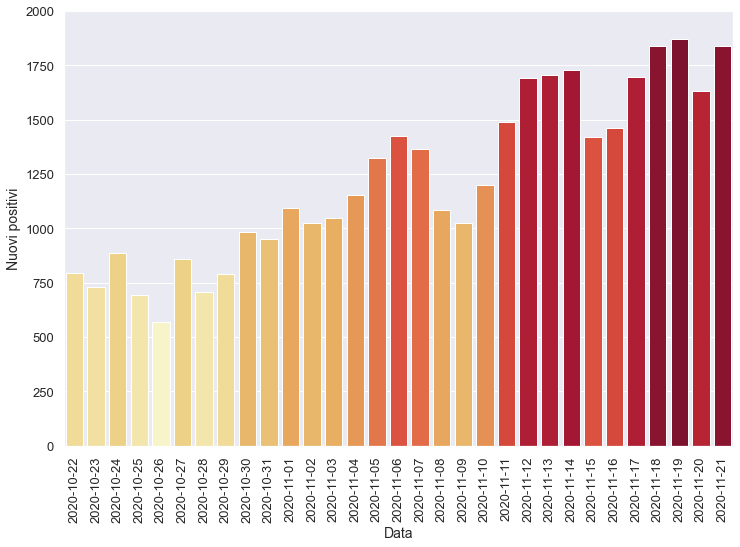

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

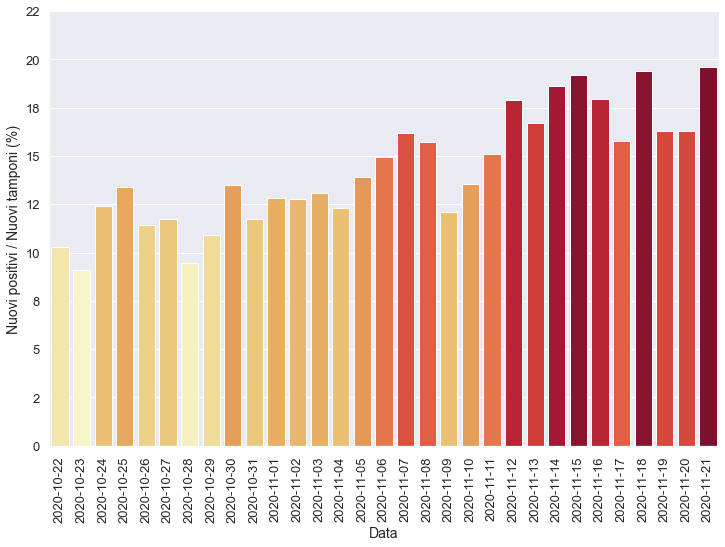

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

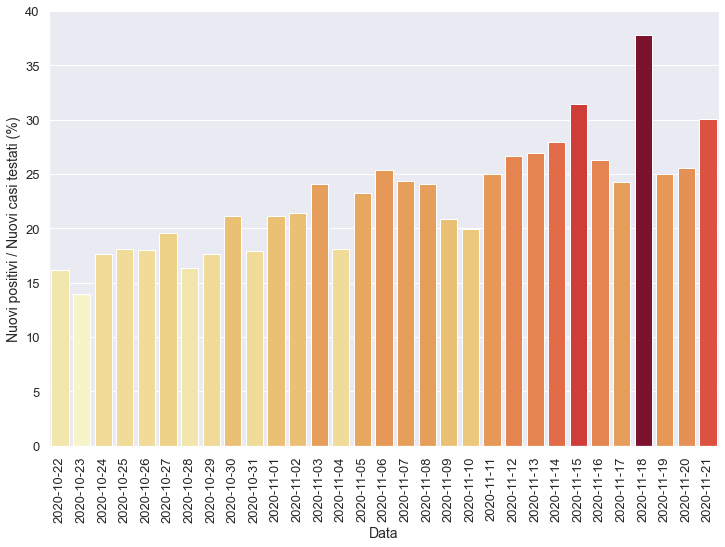

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

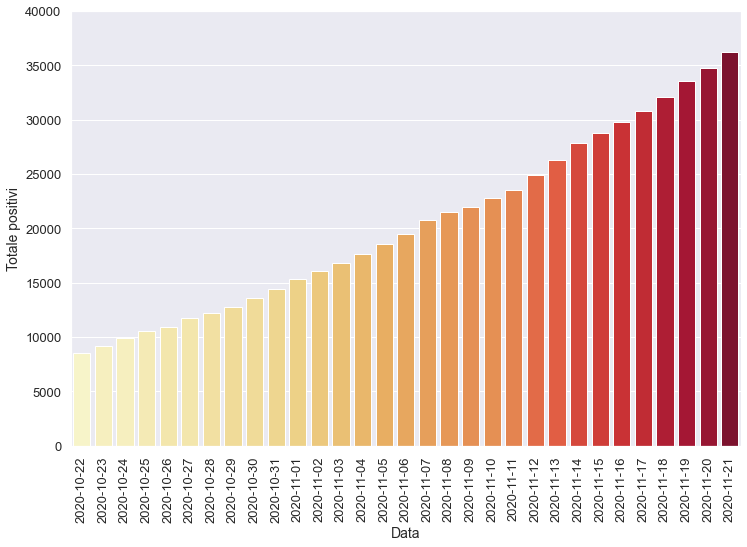

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

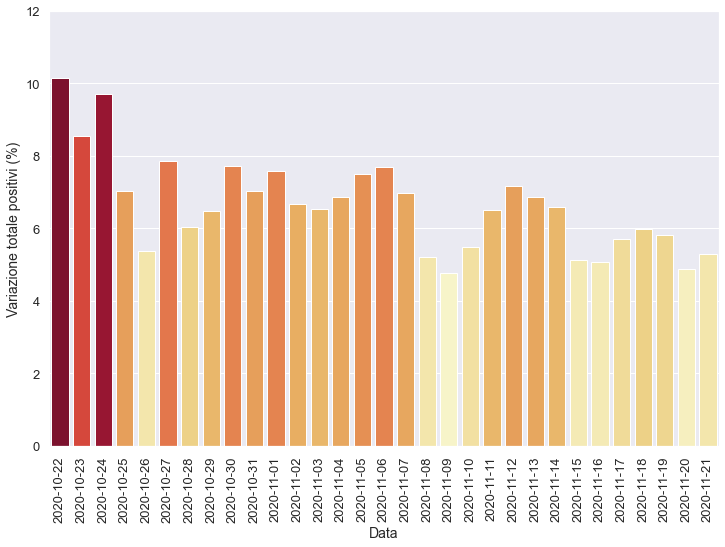

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

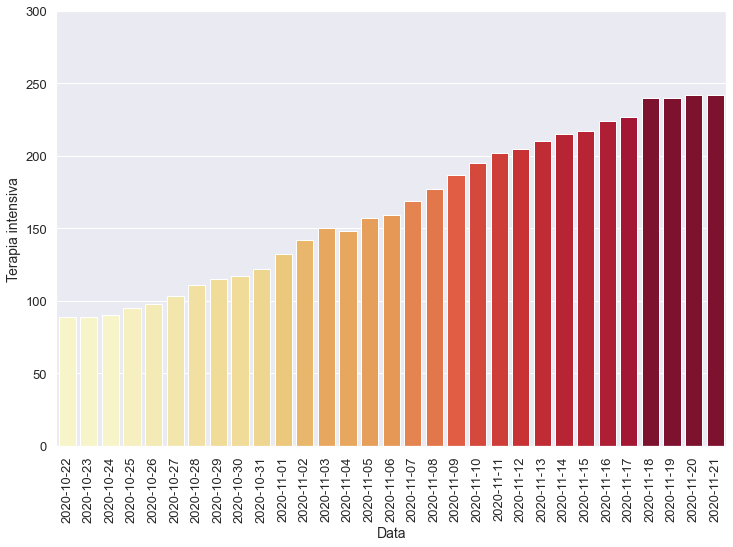

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

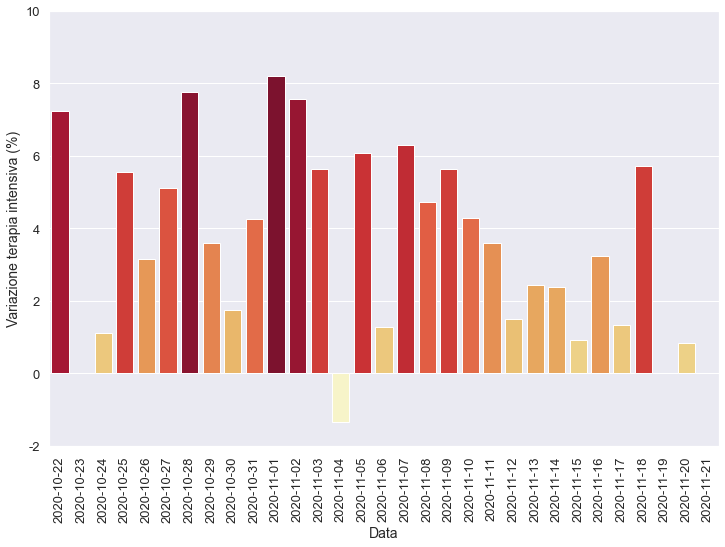

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

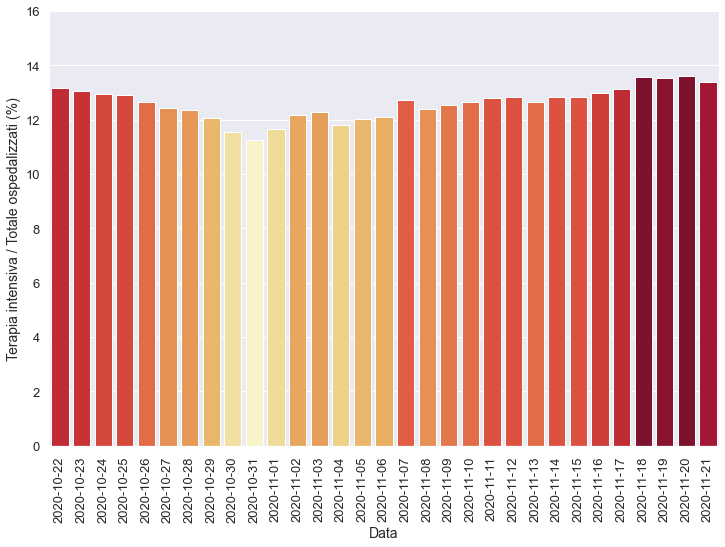

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

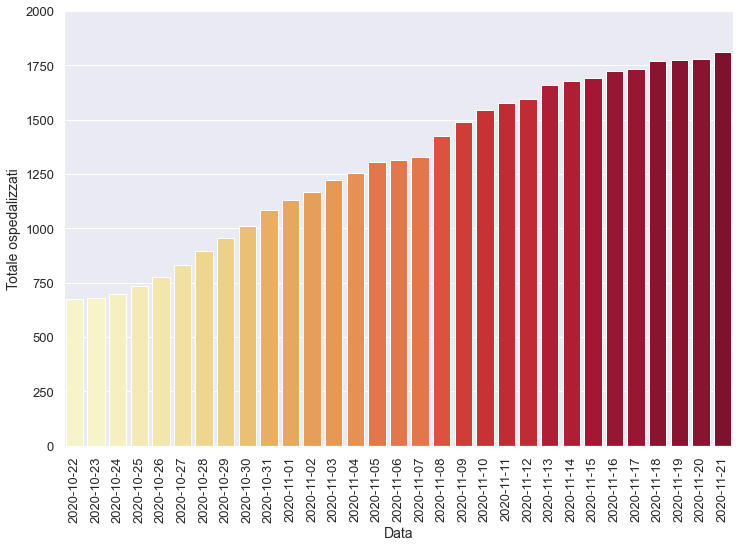

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

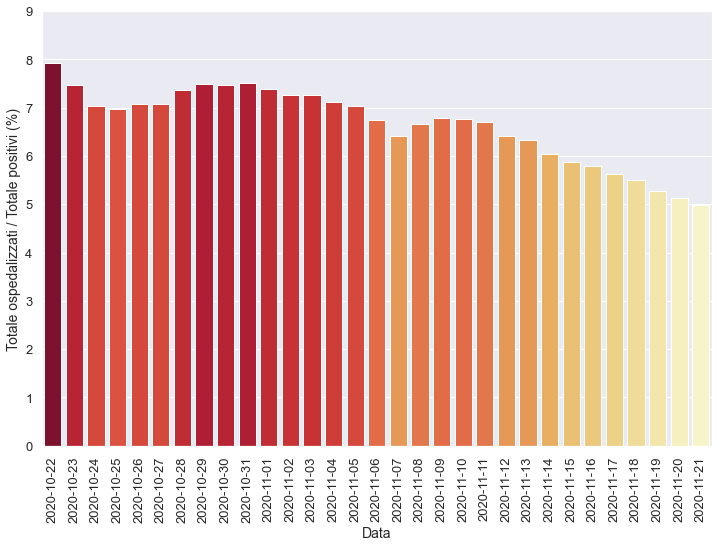

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

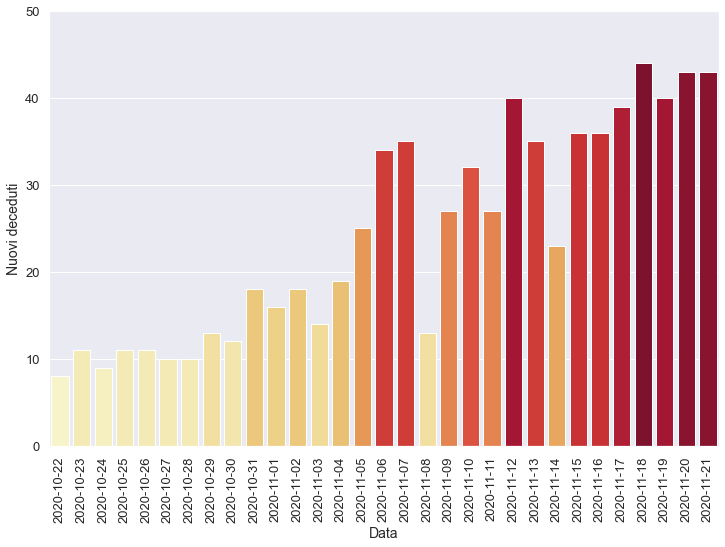

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

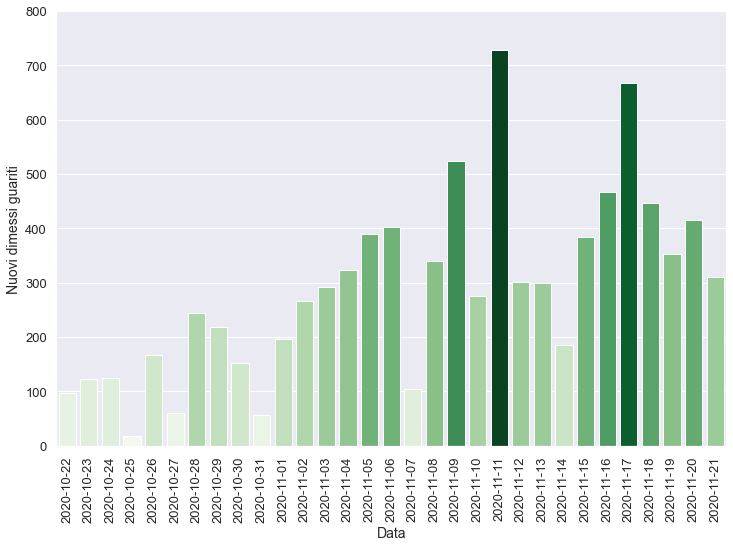

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-14T17:00:00,19,Sicilia,1462,215,1677,26129,27806,1520,1729,...,23.0,9274.0,6179.0,1503.0,12.82,6.03,18.64,27.98,2.38,6.578
1,2020-11-15T17:00:00,19,Sicilia,1476,217,1693,27114,28807,1001,1422,...,36.0,7416.0,4517.0,985.0,12.82,5.88,19.17,31.48,0.93,5.114
2,2020-11-16T17:00:00,19,Sicilia,1501,224,1725,28040,29765,958,1461,...,36.0,8151.0,5564.0,926.0,12.99,5.80,17.92,26.26,3.23,5.072
3,2020-11-17T17:00:00,19,Sicilia,1505,227,1732,29024,30756,991,1698,...,39.0,10774.0,7001.0,984.0,13.11,5.63,15.76,24.25,1.34,5.705
4,2020-11-18T17:00:00,19,Sicilia,1528,240,1768,30334,32102,1346,1837,...,44.0,9479.0,4867.0,1310.0,13.57,5.51,19.38,37.74,5.73,5.973
5,2020-11-19T17:00:00,19,Sicilia,1532,240,1772,31809,33581,1479,1871,...,40.0,11470.0,7475.0,1475.0,13.54,5.28,16.31,25.03,0.00,5.828
6,2020-11-20T17:00:00,19,Sicilia,1537,242,1779,32977,34756,1175,1634,...,43.0,10020.0,6405.0,1168.0,13.60,5.12,16.31,25.51,0.83,4.866
7,2020-11-21T17:00:00,19,Sicilia,1568,242,1810,34431,36241,1485,1838,...,43.0,9386.0,6114.0,1454.0,13.37,4.99,19.58,30.06,0.00,5.288


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

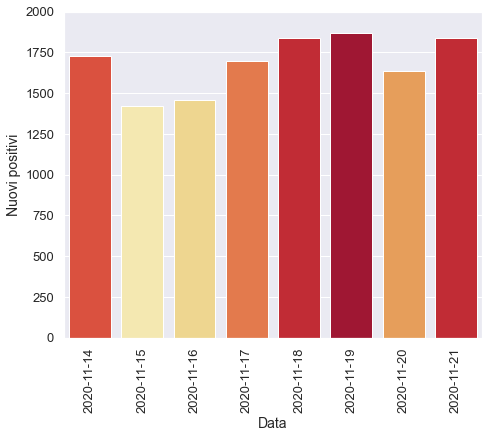

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

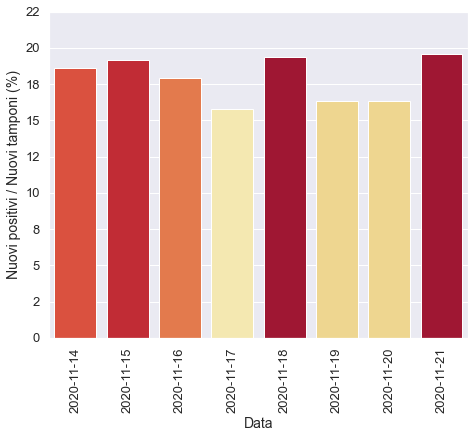

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

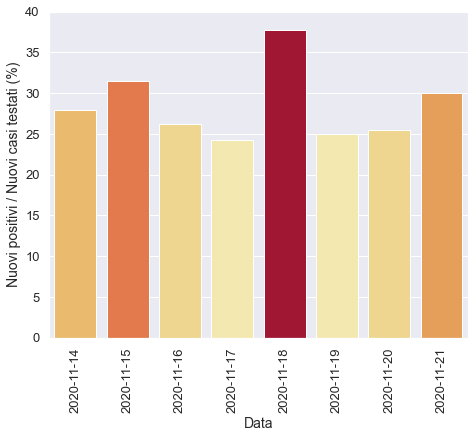

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

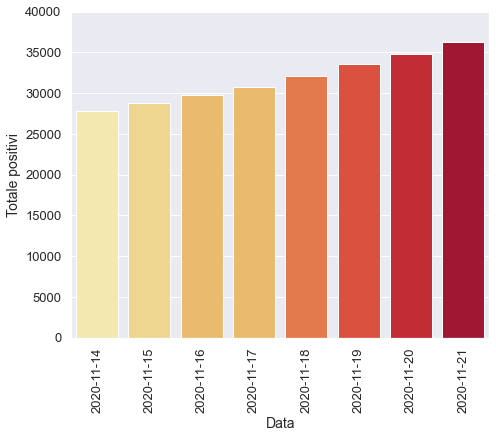

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

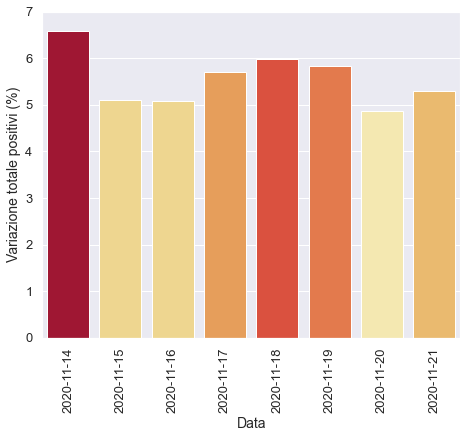

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

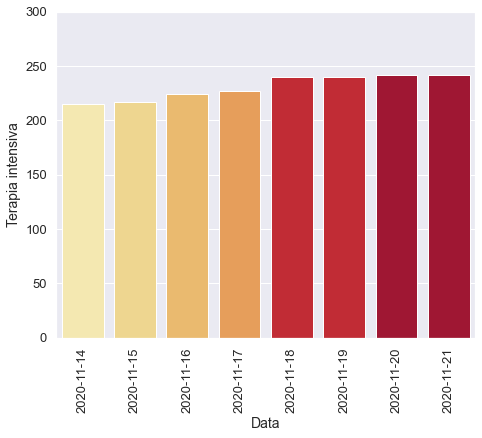

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

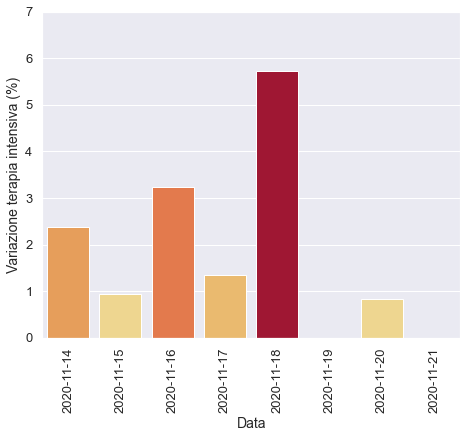

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

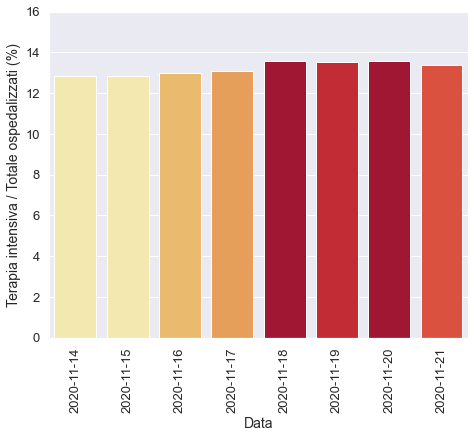

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

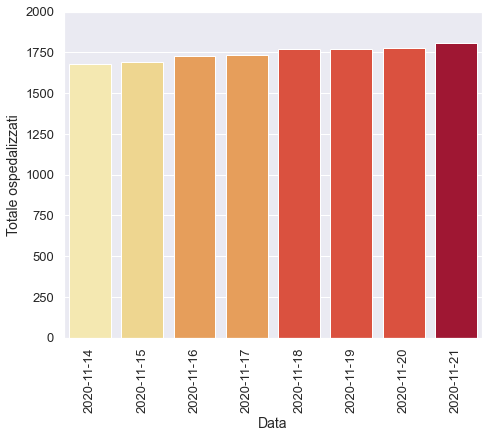

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

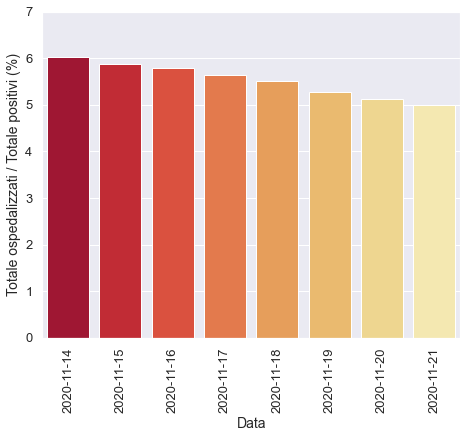

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

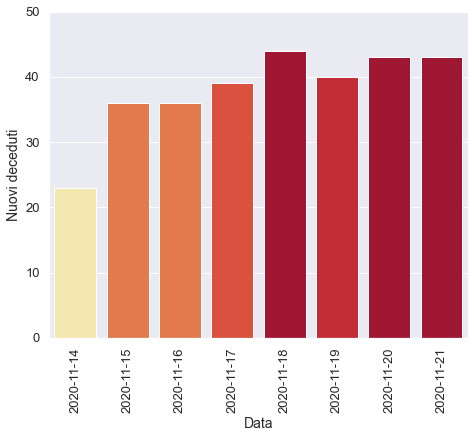

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

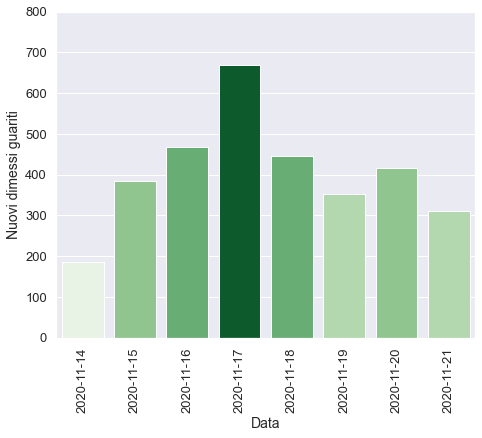

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)